## Titanic Kaggle Competition - Machine Learning from Disaster
#### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck

In [160]:
# https://www.kaggle.com/competitions/titanic/overview

In [161]:
# general libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### 1.0 Data Exploration

In [162]:
# import datasets

train = pd.read_csv\
(r"C:\Users\brianlimcn\OneDrive\Desktop\Ever_AI\Titanic_data\titanic\train.csv")

test = pd.read_csv\
(r"C:\Users\brianlimcn\OneDrive\Desktop\Ever_AI\Titanic_data\titanic\test.csv")

gender_submission = pd.read_csv\
(r"C:\Users\brianlimcn\OneDrive\Desktop\Ever_AI\Titanic_data\titanic\gender_submission.csv")

In [163]:
# view head and shape

print('Train Data Head ↓')
print(train.shape)
display(train.head(20))

print('Test Data Head ↓')
print(test.shape)
display(test.head(20))

print('Gender Submission Data Head ↓')
print(gender_submission.shape)
display(gender_submission.head(20))

Train Data Head ↓
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Test Data Head ↓
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Gender Submission Data Head ↓
(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


<b>Train data</b> consists of 891 samples, 11 features (dependent variables) and 1 target variable (independent variable) called 'Survived'
* if it's a "1", the passenger survived.
* if it's a "0", the passenger died.

<b>Test data</b> comprises of 418 samples and 11 features, <i>excluding</i> the 'Survived' target variable. We will test our models that were applied on the train dataset, against this dataset later on.

<b>Gender_submission</b> contains an example dataset with the hypothesis that all female passengers survived, and all male passengers died. Our goal in this analysis is to develop our own investigation, and thus create our own final submission/hypothesis.

For now, let us focus our exploration on the train dataset

In [164]:
# view info

print('Train Data Info ↓')
display(train.info())
print('=============================================')

# print('Test Data Info ↓')
# display(test.info())
# print('=============================================')

# print('Gender Submission Data Info ↓')
# display(gender_submission.info())

Train Data Info ↓
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

2 of the features are floats, 5 are integers and 5 are objects

Variable Notes:

* Passenger ID : A unique number assigned to each passenger

* Survived : A binary indicator of survival (0 = died, 1 = survived)

* Pclass : A proxy for socio-economic status (1 = upper, 2 = middle, 3 = lower)

* Name : Passenger’s Name. For wedded women, her husband’s name appears first and her maiden name appears in parentheses

* Sex : Passenger's gender (female, male)

* Age : Age of passenger. Passengers under the age of 1 year have fractional ages. Estimated ages are in the form xx.5

* SibSp : A count of the passenger’s siblings or spouses aboard

* Parch : A count of the passenger’s parents or children aboard

* Ticket : The number printed on the ticket. Inconsistent numbering system

* Fare : The price for the ticket

* Cabin : Cabin number occupied by the passenger (this field has many missing values)

* Embarked : The port from which the passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton)

In [165]:
# view describe

print('Train Data Describe ↓')
display(train.describe())

# print('Test Data Describe ↓')
# display(test.describe())

# print('Gender Submission Data Describe ↓')
# display(gender_submission.describe())

Train Data Describe ↓


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
# check missing values 

print('Train Data Missing Values ↓')
display(train.isna().sum())

# print('Test Data Missing Values ↓')
# display(test.isna().sum())

# print('Gender Submission Data Missing Values ↓')
# display(gender_submission.isna().sum())

Train Data Missing Values ↓


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
# let's look at the value_counts too

for column in train:
    print(column)
    display(train[column].value_counts(ascending=True, dropna=False))

PassengerId


1      1
588    1
589    1
590    1
591    1
      ..
302    1
303    1
304    1
293    1
891    1
Name: PassengerId, Length: 891, dtype: int64

Survived


1    342
0    549
Name: Survived, dtype: int64

Pclass


2    184
1    216
3    491
Name: Pclass, dtype: int64

Name


Vander Planke, Mr. Leo Edmondus                 1
Abbing, Mr. Anthony                             1
Van Impe, Miss. Catharina                       1
Larsson, Mr. Bengt Edvin                        1
Slayter, Miss. Hilda Mary                       1
                                               ..
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    1
Johnston, Mr. Andrew G                          1
Shellard, Mr. Frederick William                 1
Lennon, Mr. Denis                               1
Glynn, Miss. Mary Agatha                        1
Name: Name, Length: 891, dtype: int64

Sex


female    314
male      577
Name: Sex, dtype: int64

Age


0.92       1
66.00      1
24.50      1
36.50      1
74.00      1
34.50      1
20.50      1
55.50      1
12.00      1
0.42       1
14.50      1
53.00      1
0.67       1
23.50      1
80.00      1
70.50      1
70.00      2
13.00      2
0.83       2
40.50      2
32.50      2
55.00      2
45.50      2
57.00      2
64.00      2
71.00      2
59.00      2
10.00      2
0.75       2
63.00      2
30.50      2
28.50      2
65.00      3
61.00      3
6.00       3
7.00       3
46.00      3
8.00       4
11.00      4
60.00      4
5.00       4
62.00      4
56.00      4
43.00      5
58.00      5
15.00      5
14.00      6
3.00       6
52.00      6
37.00      6
41.00      6
49.00      6
1.00       7
51.00      7
54.00      8
9.00       8
47.00      9
44.00      9
48.00      9
2.00      10
4.00      10
50.00     10
38.00     11
45.00     12
42.00     13
17.00     13
40.00     13
39.00     14
20.00     15
34.00     15
33.00     15
23.00     15
16.00     17
31.00     17
26.00     18
35.00     18
32.00     18

SibSp


5      5
8      7
3     16
4     18
2     28
1    209
0    608
Name: SibSp, dtype: int64

Parch


6      1
4      4
3      5
5      5
2     80
1    118
0    678
Name: Parch, dtype: int64

Ticket


19972          1
S.W./PP 752    1
349910         1
3101281        1
237442         1
              ..
CA 2144        6
3101295        6
347082         7
1601           7
CA. 2343       7
Name: Ticket, Length: 681, dtype: int64

Fare


8.3000       1
15.0500      1
7.7292       1
12.2875      1
15.0458      1
7.8750       1
7.8000       1
25.5875      1
55.4417      1
38.5000      1
26.3875      1
8.4333       1
50.0000      1
8.0292       1
15.0000      1
211.5000     1
14.1083      1
9.8417       1
9.4833       1
17.4000      1
13.8625      1
51.4792      1
7.7875       1
35.0000      1
15.5500      1
28.5000      1
6.9500       1
34.6542      1
50.4958      1
13.8583      1
7.3125       1
6.2375       1
7.7250       1
8.4042       1
6.4375       1
12.2750      1
32.5000      1
7.8875       1
8.8500       1
8.1375       1
33.5000      1
59.4000      1
39.4000      1
4.0125       1
10.1708      1
34.0208      1
6.8583       1
61.3792      1
8.5167       1
9.2167       1
61.9792      1
61.1750      1
40.1250      1
7.6292       1
76.2917      1
81.8583      1
71.2833      1
221.7792     1
8.1583       1
13.7917      1
9.4750       1
47.1000      1
9.8458       1
7.0458       1
42.4000      1
10.5167      1
14.0000   

Cabin


C49                  1
C91                  1
E17                  1
E10                  1
E31                  1
B30                  1
A6                   1
C7                   1
C45                  1
A26                  1
D28                  1
C99                  1
B39                  1
B80                  1
D6                   1
B19                  1
B94                  1
C30                  1
A23                  1
D46                  1
A34                  1
C128                 1
C104                 1
C85                  1
B4                   1
D9                   1
C87                  1
D47                  1
A5                   1
D48                  1
B101                 1
E49                  1
B79                  1
E34                  1
C118                 1
E36                  1
D50                  1
E38                  1
C70                  1
A20                  1
D19                  1
C106                 1
B86                  1
C103       

Embarked


NaN      2
Q       77
C      168
S      644
Name: Embarked, dtype: int64

### 1.1 Observations of Key Variables

In [168]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html

##### Independent Variable - Survived

Only 38.4% percent of passengers survived (Survived = 1)


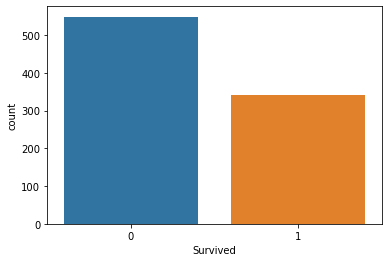

In [169]:
sns.countplot(x="Survived", data=train)
# sns.countplot(data=train, x='Survived', order=train['Survived'].value_counts(ascending=True, dropna=True).index)

survivor_rate = (train['Survived'].value_counts()[1]/(train['Survived'].value_counts()[1]+train['Survived'].value_counts()[0]))

print('Only %0.1f%%' %(survivor_rate*100), 'percent of passengers survived (Survived = 1)')

##### Sex

The majority of passengers were male


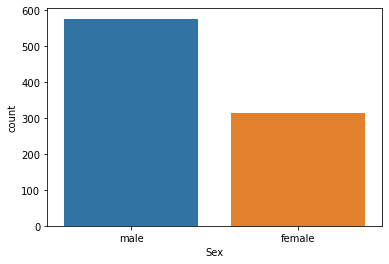

In [170]:
sns.countplot(x="Sex", data=train)
print('The majority of passengers were male')

Despite this, Females had a much higher surivial rate. Thus, Sex seems to contribute to survival


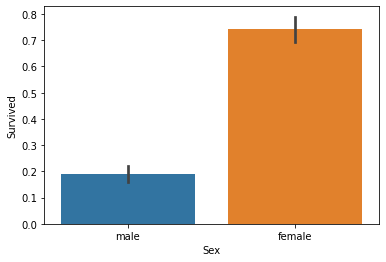

In [171]:
sns.barplot(x="Sex", y="Survived", data=train)
print('Despite this, Females had a much higher surivial rate. Thus, Sex seems to contribute to survival')

##### Pclass

The majority of passengers were from 3rd class, and the minority from 2nd class


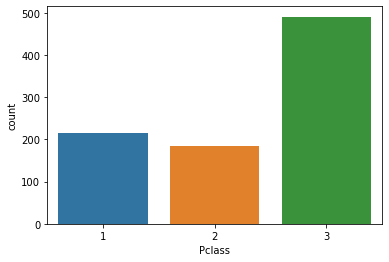

In [172]:
sns.countplot(x="Pclass", data=train)
print('The majority of passengers were from 3rd class, and the minority from 2nd class')

Similarly, despite more 3rd Class passengers, PClass seems to contribute to survival, as 1st Class passengers having a higher survival rate


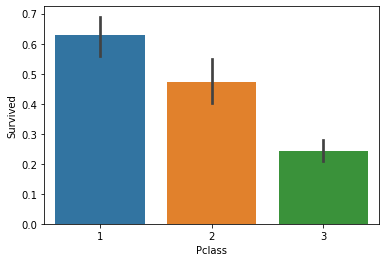

In [173]:
sns.barplot(x="Pclass", y="Survived", data=train)
print('Similarly, despite more 3rd Class passengers, PClass seems to contribute to survival, as 1st Class passengers having a higher survival rate')

##### Sex, Pclass

Women were more likely to survive than men across all classes. Additionally, women in 1st class were more likely to survive than other classes. Conversely, men in 3rd class were the least likely to survive


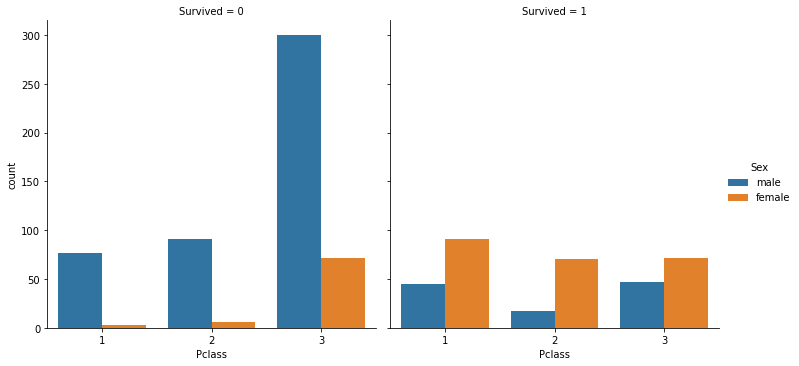

In [174]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=train, kind="count")
print('Women were more likely to survive than men across all classes. Additionally, women in 1st class were more likely to survive than other classes. Conversely, men in 3rd class were the least likely to survive')

##### Age

Passenger age distribution is concentrated in the 15 to 55 range, with a peak also observed among infants/toddlers


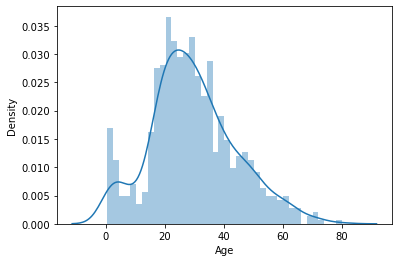

In [175]:
sns.distplot(train['Age'], bins=40)
print('Passenger age distribution is concentrated in the 15 to 55 range, with a peak also observed among infants/toddlers')

##### Age, Sex

Age also appears to have predictive power, with certain ages indicating increased odds of survival. Infants (0 to 1) have the highest likelihood of survival. Meanwhile, women have a higher PEAK chance of survival at a wider age range (approx. 14 to 40) than men (approx. 18 to 35) and women ALSO saw consistently robust survival across all ages, unlike men who saw survival rates concentrated in a more narrow range. This is despite the fact that initial age distributions (apart from slight differences in peak age) are otherwise fairly equal across male/female passengers across the x-axis (line histogram plot below), though males encounter higher densities due to overall higher population count


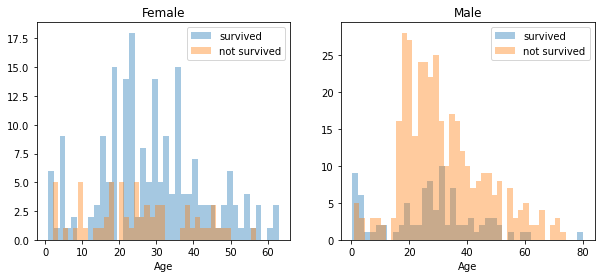

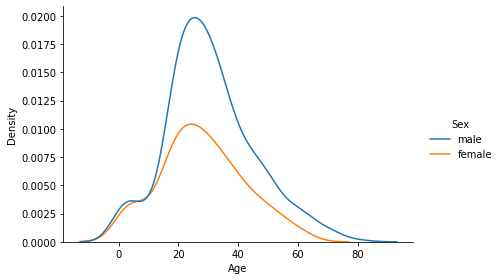

In [176]:
# borrowed style from: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# female age-survival distplot
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=40, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# male age-survival distplot
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=40, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

print('Age also appears to have predictive power, with certain ages indicating increased odds of survival. Infants (0 to 1) have the highest likelihood of survival. Meanwhile, women have a higher PEAK chance of survival at a wider age range (approx. 14 to 40) than men (approx. 18 to 35) and women ALSO saw consistently robust survival across all ages, unlike men who saw survival rates concentrated in a more narrow range. This is despite the fact that initial age distributions (apart from slight differences in peak age) are otherwise fairly equal across male/female passengers across the x-axis (line histogram plot below), though males encounter higher densities due to overall higher population count')

# https://stackoverflow.com/questions/46045750/seaborn-distplot-displot-with-multiple-distributions
sns.displot(data=train, x='Age', hue='Sex', kind='kde', height=4, aspect = 1.5)

##### Embarked

Women embarking from port Q or port S are more likely to survive, though the inverse is true if they departed from port C. The opposite is true for men embarking port C. Pclass also shows some relationship with survival in this context of port embarkation


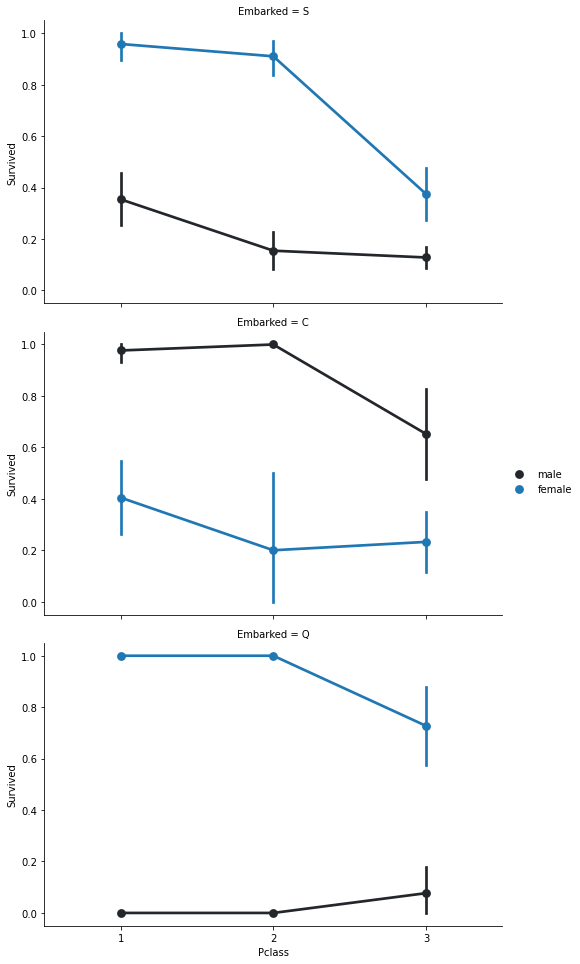

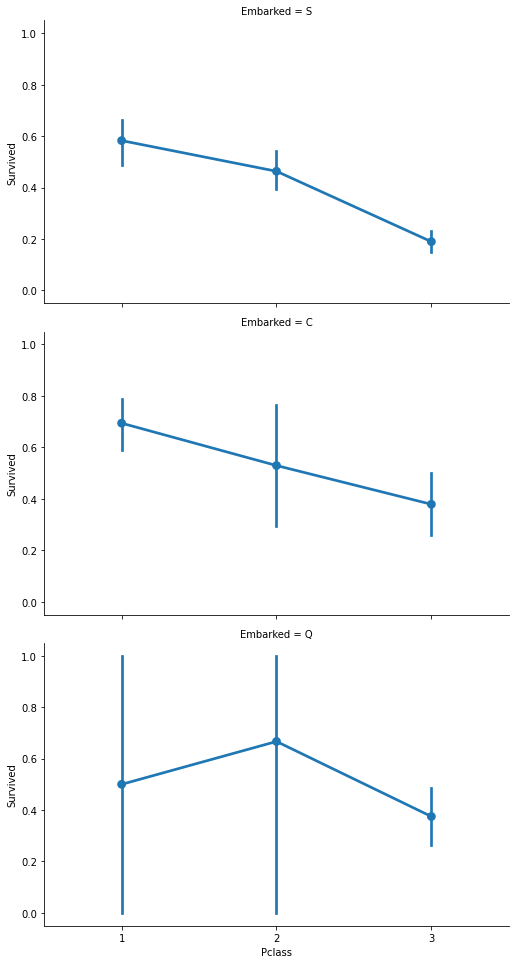

In [177]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

#With Passenger Sex
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

print('Women embarking from port Q or port S are more likely to survive, though the inverse is true if they departed from port C. The opposite is true for men embarking port C. Pclass also shows some relationship with survival in this context of port embarkation')

#WithOUT Passenger Sex
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

##### SibSp and Parch

In [178]:
# Again, borrowing from: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# Adds two new columns, 'relatives' for number of relatives onboard, and 'not_alone' as boolean for solo travellers (or not)
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int) #typecasts as integer

display(train['not_alone'].value_counts())
print('not_alone = 0 if passengers DOES HAVE relatives')

1    537
0    354
Name: not_alone, dtype: int64

not_alone = 0 if passengers DOES HAVE relatives


We can see that you had a high probabilty of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives)


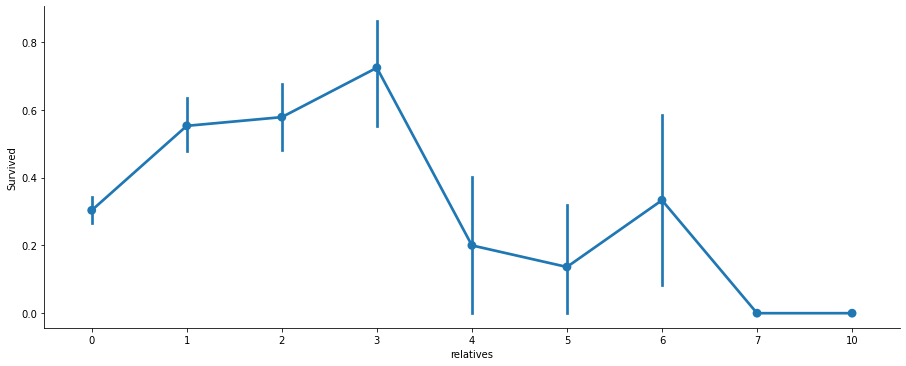

In [179]:
axes = sns.factorplot('relatives','Survived', data=train, aspect = 2.5)
print('We can see that you had a high probabilty of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives)')

1. <b>Passenger Sex is important</b>: Only 38.4% of passengers in the train dataset survived, yet most of its survivors were women despite the fact that men comprised the majority of passengers
    * Women were much more likely to survive, although men also saw non-zero survival rates, indicating that the hypothesis suggested by the Gender_submission dataset (that <i>only</i> women survived) is insufficient to predict survival. Thus, variables other than gender must also contribute to survival, though it is still a strong factor on its own.
<br>
<br>
2. <b>Passenger Class is important</b>: There also appears to be a higher rate of survivors of 1st Class passengers than other Classes, despite that 3rd Class comprised the majority of passengers. 
    * Although, 2nd Class passengers seem to show fewer survivors than 3rd Class, this does not yet refute the importance of PClass as a predictor, since the number of passengers who survived in 2nd Class is likely lower due to a lower share of 2nd Class passenger counts in the first place.
<br>
<br>
3. <b>Passenger Age is important</b>: Survival chances differed based on ranges of age, with the difference becoming clearer when accounting for gender. Women tended to see robust survival rates that follow a similar pattern to the overall female population distribution, though male survivors only indicated some pattern similarity in the 25 to 35 range
<br>
<br>
4. <b>Passenger Embarked is important</b>: Survival rates are influenced based on the port of embarkation. Though currently unclear why, a reason could be due to the manner in which passengers are assigned rooms, with passengers from certain ports likely to be grouped concurrently within the ship's hold. 
    * Titanic's schedule ran as Southampton(England) -> Cherbourg(France) -> Queenstown(US) on its journey, while it also had a numbering system for its room and deck levels. Passengers starting earlier in the journey in S may have been loaded on the ship to fill the first batch of rooms, though not necessarily following from Room (N), (N+1), (N+2)... onwards. Considerations may have been required for the ship's load-balance. Batches may have therefore instead been filled to distribute evenly across vertical decks (instead of across room numbers)  The subsequent manner in which the ship stuck the iceberg (starboard side, lower decks, where lower Pclass passengers are likely to be) and sank (stern of the ship rising in the air before the titanic split into two and sank) may have influenced the ability of certain passengers to escape, thus influencing their survival chances.
    * Alternatively, this may have also been related to the placement of lifeboats in relation to a passenger's room. Rooms located nearer to lifeboats may have improved the chances of its occupants finding a lifeboat seat, since we recall that the Titanic did not have sufficient boats for all passengers. Latecomers may have been allocated rooms further away from the lifeboats based on their 'loading batch' when embarking at specific ports. 
<br>
<br>
5. <b>Passenger Cabin MAY BE important</b>: Our points made in 4. highlight the possibility that a passenger's starting position within a ship could contribute to survival. Starting positions during the start of the sink event would indicate a passenger's proximity to lifeboats, or proximity to danger (which parts of the titanic's hold became submerged/flooded first? which last?)
    * However, Cabin data contains many missing entries. Some data engineering may be required to extract useful information
<br>
<br>
6. <b>Passenger SibSp and Parch MAY BE important</b>: Having family members on board contributed to survival rates, but mostly only if your family size was small (<3 members)
    * Larger families were likely belonging to lower Pclass passengers as lower socioeconomic level families tend to have more offspring. Larger families may have also had a harder time finding enough room for all their members on a lifeboat, thus possibly reducing survival if the families choose to remain together (on the titanic).

In [180]:
# https://emmacruises.com/titanic-route-and-port-stops/
# https://titanic.fandom.com/wiki/Break-up_of_the_Titanic
# https://www.encyclopedia-titanica.org/ice-on-deck.html

### 2.0 Data Pre-Processing

##### Ticket
<a id='another_cell'></a>

7. <b>Tickets may provide some additional information on non-familial relationship ties among passengers.</b> 
    * Tickets are not strictly all unique. Tickets bought as a group appear to all have the same number, and we observe that there are 681 unique ticket values in train vs. 891 samples (despite no missing Ticket data)
    * Thus, a group of 4 who bought a ticket together in the same Travel Group will have the same number on all their tickets (You can observe this in 'train_Tsort' below)
    * Similar to our hypotheses in 6. there might therefore be an influence of Travel Group on survival. Travel groups can be non-familial (friends, co-workers, master-servant relationships), yet still have an impact on survival if we assume there is some level of group cohesion in behavior during the emergency

In [181]:
# http://rstudio-pubs-static.s3.amazonaws.com/227239_a42941af5d7d457398ed3721f9ad0f6f.html
# let's view the train data sorted by Ticket to observe any groups among ticket number holders

train_Tsort = train.sort_values(by=['Ticket'], ascending=False)
print('Note the consistency of the Ticket serial number with "relatives" for passengers 746 and 541 (group of 2), as well as 437, 737, 87 and 148 (group of 4)')
display(train_Tsort.head(10))

Note the consistency of the Ticket serial number with "relatives" for passengers 746 and 541 (group of 2), as well as 437, 737, 87 and 148 (group of 4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.000,B22,S,2,0
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.000,B22,S,2,0
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S,0,1
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S,1,0
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.550,NaN,S,0,1
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,4,0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S,4,0
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S,4,0
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S,4,0
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.450,NaN,S,3,0


In [182]:
print('There are not many, but here is a view of some Travel Groups that bought a ticket together but are NOT relatives (SibSp/Parch)')
train_Tsort2 = train.loc[train['relatives'] == 0]
travel_groups_view = pd.DataFrame(train_Tsort2['Ticket'].value_counts(ascending=True, dropna=False))
travel_groups_view.tail(30)

There are not many, but here is a view of some Travel Groups that bought a ticket together but are NOT relatives (SibSp/Parch)


,Ticket
8471,1
11771,1
14973,1
STON/O 2. 3101274,1
347464,1
367231,1
7534,2
2627,2
364516,2
PC 17477,2


In [183]:
# https://stackoverflow.com/questions/38954525/how-to-have-catagorical-factor-variables-in-python
# https://stackoverflow.com/questions/15723628/pandas-make-a-column-dtype-object-or-factor
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe
# https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers

# may have to use get-dummies if categorical/as-factor changes here doesnt work 

# assign a new variable 'Travelgroup' as category, using Ticket data
# converting to astype category again is unecessary (but why?)
data = [train, test]
for dataset in data:
    dataset['Travelgroup'] = dataset['Ticket'].astype('category')
    # convert our ticket values into category codes/factors (1, 2, 3...etc) for easier model processing later on 
    dataset['Travelgroup'] = dataset.Travelgroup.cat.codes
#     # re-convert Travelgroup astype 'category' since it reverted to int16
#     dataset['Travelgroup'] = dataset['Travelgroup'].astype('category')
    # now to drop Ticket
    dataset.drop('Ticket', axis=1, inplace=True)

display(train)
display(train.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,0,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,596
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,1,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,0,1,101
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,0,1,14
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,3,0,675
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,0,1,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int32  
 13  Travelgroup  891 non-null    int16  
dtypes: float64(2), int16(1), int32(1), int64(6), object(4)
memory usage: 88.9+ KB


None

##### Dropping Unecessary Variables: PassengerId, SibSP and Parch

In [184]:
# PassengerID are unique. So lets drop these from the dataset
# Since we also already have the new relatives variable, lets also drop SibSp and Parch
data = [train, test]
for dataset in data:
    dataset.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
    
train

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,1,0,523
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,1,0,596
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,0,1,669
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,1,0,49
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,0,1,472
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,NaN,S,0,1,101
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,B42,S,0,1,14
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,NaN,S,3,0,675
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C148,C,0,1,8


### 2.1 Missing Values

In [185]:
# Among our data, Age, Cabin, Embarked & Fare have missing values

print('Train Data Missing Values ↓')
display(train.isna().sum())

print('Test Data Missing Values ↓')
display(test.isna().sum())

Train Data Missing Values ↓


Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Cabin          687
Embarked         2
relatives        0
not_alone        0
Travelgroup      0
dtype: int64

Test Data Missing Values ↓


Pclass           0
Name             0
Sex              0
Age             86
Fare             1
Cabin          327
Embarked         0
relatives        0
not_alone        0
Travelgroup      0
dtype: int64

##### Embarked

In [186]:
# Embarked only has two missing values in train. So let's fill this in with the most common value

common_value = train['Embarked'].describe()[2] # returns 'S'

data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
display(train.isna().sum())

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
Cabin          687
Embarked         0
relatives        0
not_alone        0
Travelgroup      0
dtype: int64

##### Fare

In [187]:
# Fare only has on missing value in test. Let's find an appropriate value to assign based on the passenger's PClass and Embarked
# This is because the ticket fare is likely determined based on the class and length of journey

test_fare_nan = test[test['Fare'].isnull()]
display(test_fare_nan)
print('It is observed here that the passenger in question Embarked from "S" and was in Pclass=3')

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup
152,3,"Storey, Mr. Thomas",male,60.5,NaN,NaN,S,0,1,239


It is observed here that the passenger in question Embarked from "S" and was in Pclass=3


In [188]:
fare_filter = ['S']

# find all entries where Pclass == 3 and Embarked = 'S' in train and test
data = [train, test]
for dataset in data:
        fare_result = dataset[(dataset['Pclass'] == 3) & dataset['Embarked'].isin(fare_filter)]

# sort by relatives 
display(fare_result.sort_values(by=['relatives'], ascending=False))

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup
188,3,"Sage, Miss. Ada",female,NaN,69.5500,NaN,S,10,0,296
342,3,"Sage, Mr. John George",male,NaN,69.5500,NaN,S,10,0,296
360,3,"Sage, Master. William Henry",male,14.50,69.5500,NaN,S,10,0,296
365,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,69.5500,NaN,S,10,0,296
139,3,"Goodwin, Mr. Charles Frederick",male,40.00,46.9000,NaN,S,7,0,294
140,3,"Goodwin, Miss. Jessie Allis",female,10.00,46.9000,NaN,S,7,0,294
379,3,"Asplund, Master. Carl Edgar",male,5.00,31.3875,NaN,S,6,0,181
174,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.00,31.3875,NaN,S,6,0,181
214,3,"Andersson, Miss. Ida Augusta Margareta",female,38.00,7.7750,NaN,S,6,0,186
154,3,"Asplund, Master. Filip Oscar",male,13.00,31.3875,NaN,S,6,0,181


In [189]:
# https://www.dummies.com/article/academics-the-arts/history/20th-century/suites-and-cabins-for-passengers-on-the-titanic-180677/

* Fares for the 3rd Class were between £3–£8, and we can observe that the Fare variable for each passenger is actually the total price for the number of tickets bought as a group either as relatives or as travelgroup. 
    * So in our "fare_result" dataframe that has been sorted by "relatives", we can observe that dividing the Fare by the relatives gives a price that falls within the 3rd Class ticket price range. 
    * However, exceptions also are present, such as for Andersson, Miss. Ida Augusta Margareta (iloc[214]) we observe that she has 6 relatives but has a ticket price of roughly 1 person (£7.775), indicating that although she was travelling with family, she likely bought her ticket at a separate time
<br>
<br>
* We can try to solve this by finding what the per-passenger fare would be, by dividing 'Fare' with 'relatives to get the per-passenger fare:

In [190]:
# initiate new column as equal to 'Fare'
fare_result['solo_fare'] = fare_result['Fare']

# rows where the division result is >=3 or <=8 are kept, while all others remain as the original 'Fare'
fare_result.loc[((fare_result.Fare / fare_result.relatives) >= 3) 
                 & ((fare_result.Fare / fare_result.relatives) <= 8), 'solo_fare'] = (fare_result.Fare / fare_result.relatives)
fare_result


# ================================================================================

# # tried using this method but it does not seem to make any changes to solo_fare
# https://stackoverflow.com/questions/71995560/problem-with-for-if-loop-statement-operation-on-pandas-dataframe
# issue might be resolved with changing to fare_result.loc[i, 'solo_fare'] = p?
# ==========================================================================================

# # reset index first to make sure our for-if loop below runs correctly
# fare_result = fare_result.reset_index()
# # initiate new empty column
# fare_result['solo_fare'] = np.nan


# for i in range(0, len(fare_result)):
#     p = fare_result.iloc[i]['Fare']/fare_result.iloc[i]['relatives']
#     q = fare_result.iloc[i]['Fare']
#     r = fare_result.iloc[i]['relatives']
    
#     # if relatives == 0, return original Fare amount
#     if (r == 0):
#         fare_result.iloc[i]['solo_fare'] = q
#     # if the divided fare is below 3 or more than 8, return original Fare amount again
#     elif (p < 3) and (p > 8):
#         fare_result.iloc[i]['solo_fare'] = q
#     # else, return the divided fare to get solo_fare
#     else:
#         fare_result.iloc[i]['solo_fare'] = p
        
# fare_result

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup,solo_fare
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,7.0000,NaN,S,1,0,221,7.000000
3,3,"Wirz, Mr. Albert",male,27.00,8.6625,NaN,S,0,1,147,8.662500
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,12.2875,NaN,S,2,0,138,6.143750
5,3,"Svensson, Mr. Johan Cervin",male,14.00,9.2250,NaN,S,0,1,261,9.225000
9,3,"Davies, Mr. John Samuel",male,21.00,24.1500,NaN,S,2,0,269,24.150000
10,3,"Ilieff, Mr. Ylio",male,NaN,7.8958,NaN,S,0,1,195,7.895800
18,3,"Ilmakangas, Miss. Ida Livija",female,27.00,7.9250,NaN,S,1,0,356,7.925000
21,3,"Olsen, Master. Artur Karl",male,9.00,3.1708,NaN,S,1,0,277,3.170800
25,3,"Robins, Mr. Alexander A",male,50.00,14.5000,NaN,S,1,0,273,14.500000
32,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",female,33.00,20.5750,NaN,S,3,0,280,6.858333


* However, the issue with this method is that the results are inconsistent. 
    * Above, we can see that some passengers encountered a fare price of >£8, such as Davies, Mr. John Samuel (iloc[4]), who paid 12.075 per ticket or Hee, Mr.Ling (iloc[14]) who paid 56.4958 for his ticket despite having no relatives (maybe does have in Travelgroup?) 
    * To get more consistent results, we should also run a similar operation with a new variable Travelgroup group size count, though this may still face issues with cases like Mr Davies, who had their relatives accounted for but still saw >£8 prices.
<br>
<br>
* Instead, lets calculate the mean fare for Mr. Thomas Storey simply based on the mean of passengers where relatives == 0

In [191]:
# filter only where relatives == 0, then find the mean value
fare_result_filter = fare_result[(fare_result['relatives'] == 0)]
mean_missing_fare = fare_result_filter['Fare'].mean()
print('mean_missing_fare:',mean_missing_fare)

# Add the mean value back into the missing entry for Mr. Thomas Storey, index 152
# note that this mean Fare is calculated using both train and test data where Pclass = 3, relatives = 0, Embarked = 'S'
test['Fare'] = test['Fare'].fillna(mean_missing_fare)
test.iloc[[152]]

mean_missing_fare: 9.339329670329667


,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,relatives,not_alone,Travelgroup
152,3,"Storey, Mr. Thomas",male,60.5,9.33933,NaN,S,0,1,239


##### Age

In [192]:
# for this section, I will borrow from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
# age has 263 missing values across train (177) and test (86)
# The method used here is to fill all NaN values with random ages between ±1 of the mean age to the std. of age

data = [train, test]
for dataset in data:
    mean = train['Age'].mean()
    std = test['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated and cast all as type int
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train['Age'].astype(int)
    
# now to just check if they have been filled
train["Age"].isnull().sum()

# Though this appears to be a decent method, I think a more robust method would be to also consider SibSp and Name variables
# Names come with maiden names for married women and titles, while SibSp measures siblings and spouses. 
# Thus a woman's name with a husband's name attached, together with a high SibSp count should be older 
# Alternatively, a woman's name with "Ms." title prefix (and fewer SibSp) is likely to be younger (as they are not married yet.)
# However, running such an operation with all these conditions may require a separate ML model just for this, with currently
# it being unclear if possible to compare the validity of the results in a supervised manner (with target variable answers)
# given so few valid cabin data to begin with

0

##### Cabin

In [193]:
# again, borrowing from https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
import re

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data = [train, test]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0") # 1. fill all NaN with 0
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) # 2. seek all letters from Cabin and map to Deck
    dataset['Deck'] = dataset['Deck'].map(deck) # 3. convert all letters into integers as assigned in 'deck'
    dataset['Deck'] = dataset['Deck'].fillna(0) # fill all NaN again with 0 (extracting letters from '0' in step 2 will return NaN as well)
    dataset['Deck'] = dataset['Deck'].astype(int) # cast as type integer
    
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,relatives,not_alone,Travelgroup,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,1,0,523,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,C,1,0,596,3
2,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,0,1,669,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,S,1,0,49,3
4,0,3,"Allen, Mr. William Henry",male,35,8.0500,S,0,1,472,8
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,13.0000,S,0,1,101,8
887,1,1,"Graham, Miss. Margaret Edith",female,19,30.0000,S,0,1,14,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,16,23.4500,S,3,0,675,8
889,1,1,"Behr, Mr. Karl Howell",male,26,30.0000,C,0,1,8,3


In [194]:
# We could consider ways in which missing cabin data is better replaced. Similar to age, we could actually run an 
# ML model to determine what deck a passenger has for the missing values  

# Datapoints that could be useful are: 
# Embarked - which leg of the journey the passenger boarded, and thus which batch of cabins the onboarding batch might be assigned
# SibSp & Parch OR/AND Ticket - relatives are likely to stay together/near together
# PClass - higher classes are located generally on higher deck levels
# Fare - similar to PClass, higher deck levels would therefore have higher ticket prices

### 2.2 Data Transformation

#### Converting Features

In [195]:
# We can see that ‘Fare’ is a float and we have to deal with 3 objects features: Name, Sex and Embarked
# Ticket (another object) was dropped earlier after generating the new Travelgroup variable

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    int32  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   relatives    891 non-null    int64  
 8   not_alone    891 non-null    int32  
 9   Travelgroup  891 non-null    int16  
 10  Deck         891 non-null    int32  
dtypes: float64(1), int16(1), int32(3), int64(3), object(3)
memory usage: 61.0+ KB


##### Converting: Fare (as type int), Sex (to numeric) and Embarked (to numeric)

In [196]:
genders = {"male": 0, "female": 1}
ports = {"S": 0, "C": 1, "Q": 2}

data = [train, test]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int) # fare as type int
    dataset['Sex'] = dataset['Sex'].map(genders) # sex to numeric
    dataset['Embarked'] = dataset['Embarked'].map(ports) # embarked to numeric
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Survived     891 non-null    int64 
 1   Pclass       891 non-null    int64 
 2   Name         891 non-null    object
 3   Sex          891 non-null    int64 
 4   Age          891 non-null    int32 
 5   Fare         891 non-null    int32 
 6   Embarked     891 non-null    int64 
 7   relatives    891 non-null    int64 
 8   not_alone    891 non-null    int32 
 9   Travelgroup  891 non-null    int16 
 10  Deck         891 non-null    int32 
dtypes: int16(1), int32(4), int64(5), object(1)
memory usage: 57.6+ KB


##### Converting: Name

In [197]:
# http://rstudio-pubs-static.s3.amazonaws.com/227239_a42941af5d7d457398ed3721f9ad0f6f.html
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

# Others have noted that names in the dataset include passenger titles, which can serve as useful markers for a 
# person's socio-economic status, thus serving as proxy data for the passenger's Pclass too. 

# extract list of titles using regex. Titles are followed by a '.'
data = [train, test]
for dataset in data:
    dataset['Title_temp'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
# we now have titles for both train and test
# display(train['Title_temp'].unique())
# display(test['Title_temp'].unique())

# concatenate the two arrays for the full list of titles used on Titanic
titles_list = np.concatenate((train['Title_temp'].unique(), test['Title_temp'].unique()), axis=None)
titles_list

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev',
       'Dr', 'Dona'], dtype=object)

In [198]:
# now let's see the count of each to determine how to best convert them to numeric
frames = [train['Title_temp'], test['Title_temp']]
total_titles = pd.concat(frames)
total_titles.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Mme           1
Countess      1
Capt          1
Sir           1
Dona          1
Don           1
Jonkheer      1
Lady          1
Name: Title_temp, dtype: int64

Let's look at the definitions of the rarer titles:

* Dr =       Doctor, medical/PHD <br>
* Rev =      Reverend, a priest <br>
* Col =      Colonel, an armyman title <br>
* Mlle =     Mademoiselle, traditionally given to an unmarried woman. The equivalent in English is "Miss" <br>
* Major =    An armyman title <br>
* Ms =       Short for "Miss" <br>
* Capt =     Captain, an armyman title <br>
* Dona =     Female version of “Don” <br>
* Sir =      English Honorific address (male) <br>
* Lady =     English Honorific address (female) <br>
* Countess = Rank of nobility (female) <br>
* Don =      Spanish/Spanish Colonies Honorific address (male) <br>
* Mme =      Madame, referring to women in general, or equivalent to "Mrs" <br>
* Jonkheer = Dutch honorific address (male or female) <br>


Thus, it is noted that we can replace some titles with their english equivalents:<br>
* Mlle replaced with Miss <br>
* Ms replaced with Miss <br>
* Mme replaced with Mrs <br>

In [199]:
# https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown

[Continuing on our hypotheses list earlier...](#another_cell)

8. <b>Titles may provide some additional information on passenger status, as a proxy to Pclass.</b> 
    * Rare titles such as Sir, Don and Countess are attributed to passengers of high nobility, status or rank
    * Not only are these passengers likely to be in 1st Class, they are also likely to command a greater chance of finding room on a lifeboat (aka: survival == 1)



In [200]:
# So lets process a new variable 'Title' and assign all rare title types as 'Rare'

# first lets drop our Title_temp column as it was just for investigative purposes earlier
train = train.drop('Title_temp', 1)
test = test.drop('Title_temp', 1)

# assign numeric values to titles we want to use, and list of titles we want to remove
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titles_rare = ['Dr','Rev','Col','Major','Capt','Dona','Sir','Lady','Countess','Don','Jonkheer']

# run extraction, replacement and convert to numeric
data = [train, test]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(titles_rare, 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, if any
    dataset['Title'] = dataset['Title'].fillna(0)

# now to drop the defunct 'Name' variable
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [201]:
# Scale all data to 0-1? (like fare)
# do i really have to convert ticket to categorical or can leave as int64

#### Discretize Variables into equal-sized buckets

In [202]:
# let's separate all variables with large ranges into equal sized bins with sklearn's qcut()
# qcut tries to divide up the underlying data into equal sized bins. The function defines the 
# bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins

# https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
# https://pbpython.com/pandas-qcut-cut.html

In [203]:
# Age

# run qcut with 8 bins (for ages up to 80) and assign labels into new column
data = [train, test]
for dataset in data:
    output_qcut1 = pd.qcut(dataset.Age, q=8)
    dataset['Age_qcut'] = pd.qcut(dataset.Age, q=8,
                        labels=['1',
                                '2',
                                '3',
                                '4',
                                '5',
                                '6',                                
                                '7',                               
                                '8'])
    dataset.drop('Age', axis=1, inplace=True) # drop original Age column 

display(output_qcut1.head(0)) # this is just to show what category ranges qcut divided the data into
display(train.head()) # can use this to view our new column created
display(train['Age_qcut'].value_counts(dropna=False).sort_index()) # view distribution of ages by category

Series([], Name: Age, dtype: category
Categories (8, interval[float64]): [(-0.001, 16.0] < (16.0, 21.0] < (21.0, 24.0] < (24.0, 28.0] < (28.0, 32.0] < (32.0, 37.0] < (37.0, 42.0] < (42.0, 71.0]])

,Survived,Pclass,Sex,Fare,Embarked,relatives,not_alone,Travelgroup,Deck,Title,Age_qcut
0,0,3,0,7,0,1,0,523,8,1,3
1,1,1,1,71,1,1,0,596,3,3,6
2,1,3,1,7,0,0,1,669,8,2,4
3,1,1,1,53,0,1,0,49,3,3,6
4,0,3,0,8,0,0,1,472,8,1,6


1    115
2    133
3     89
4    131
5    101
6    113
7    108
8    101
Name: Age_qcut, dtype: int64

In [204]:
# Fare

# run qcut with 5 bins (worked best in this case) and assign labels into new column
data = [train, test]
for dataset in data:
    output_qcut2 = pd.qcut(dataset.Fare, q=5)
    dataset['Fare_qcut'] = pd.qcut(dataset.Fare, q=5,
                        labels=['1',
                                '2',
                                '3',
                                '4',
                                '5'])
    dataset.drop('Fare', axis=1, inplace=True) # drop original Fare column 

display(output_qcut2.head(0)) # this is just to show what category ranges qcut divided the data into
display(train.head()) # can use this to view our new column created
display(train['Fare_qcut'].value_counts(dropna=False).sort_index()) # view distribution of fares by category

Series([], Name: Fare, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.0] < (7.0, 10.0] < (10.0, 21.0] < (21.0, 45.6] < (45.6, 512.0]])

,Survived,Pclass,Sex,Embarked,relatives,not_alone,Travelgroup,Deck,Title,Age_qcut,Fare_qcut
0,0,3,0,0,1,0,523,8,1,3,1
1,1,1,1,1,1,0,596,3,3,6,5
2,1,3,1,0,0,1,669,8,2,4,1
3,1,1,1,0,1,0,49,3,3,6,5
4,0,3,0,0,0,1,472,8,1,6,2


1    241
2    123
3    171
4    180
5    176
Name: Fare_qcut, dtype: int64

In [205]:
# convert back to type integer
data = [train, test]
for dataset in data:
    dataset['Age_qcut'] = dataset['Age_qcut'].astype(int)
    dataset['Fare_qcut'] = dataset['Fare_qcut'].astype(int)
    
# just to check if all columns are ok
display(train.info())
display(test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Embarked     891 non-null    int64
 4   relatives    891 non-null    int64
 5   not_alone    891 non-null    int32
 6   Travelgroup  891 non-null    int16
 7   Deck         891 non-null    int32
 8   Title        891 non-null    int64
 9   Age_qcut     891 non-null    int32
 10  Fare_qcut    891 non-null    int32
dtypes: int16(1), int32(4), int64(6)
memory usage: 57.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pclass       418 non-null    int64
 1   Sex          418 non-null    int64
 2   Embarked     418 non-null    int64
 3   relatives    418 non-null    int64
 4   not_alone    418 non-null    int32
 5   Travelgroup  418 non-null    int16
 6   Deck         418 non-null    int32
 7   Title        418 non-null    int64
 8   Age_qcut     418 non-null    int32
 9   Fare_qcut    418 non-null    int32
dtypes: int16(1), int32(4), int64(5)
memory usage: 23.8 KB


None

### 3.0 Trying out Models

In [206]:
# model libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# model preparation and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Seeding to ensure consistent accuracy scores for every model iteration
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

#### 3.1 Method 1 (Train-Test-Split)

##### Errors with this method:

The following section 3.1 was left as comments since I tried running a train-test-split on train data (since we dont have target column in test data). However, during calculation of accuracy scores, I encountered an error.
<br>
<br>
<b>ValueError: Expected 2D array, got 1D array instead</b>
<br>
<br>
I did try to troubleshoot, however, I was unable to correct the issue. [Please view my question on StackOverflow here](https://stackoverflow.com/questions/72010335/reshape-your-data-either-using-array-reshape-1-1-during-model-predict)

Otherwise, [jump to 3.2 Method 2](#method_2)

In [207]:
# # since Survived data is not present within the test datset, let's split our train set into train and validation sets to 
# # run predictions on itself
# X = train.drop("Survived", axis=1)
# Y = train["Survived"]
# X_test  = test

# X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=42, test_size=0.20, stratify=Y)

# # (stratify = Y): split the dataset into train and test sets in a way that preserves the same proportions of examples 
# # in each class as observed in the original dataset
# # https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

# print('Shape of X_train=>',X_train.shape)
# print('Shape of X_valid=>',X_valid.shape)
# print('Shape of Y_train=>',Y_train.shape)
# print('Shape of Y_valid=>',Y_valid.shape)

In [208]:
# # https://stackoverflow.com/questions/72010335/reshape-your-data-either-using-array-reshape-1-1-during-model-predict
# Y_valid2 = Y_valid.values.reshape(-1,1)

In [209]:
# %%time

# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)

# Y_pred = random_forest.predict(X_valid)

# acc_random_forest = round(random_forest.score(Y_valid, Y_pred) * 100, 2)

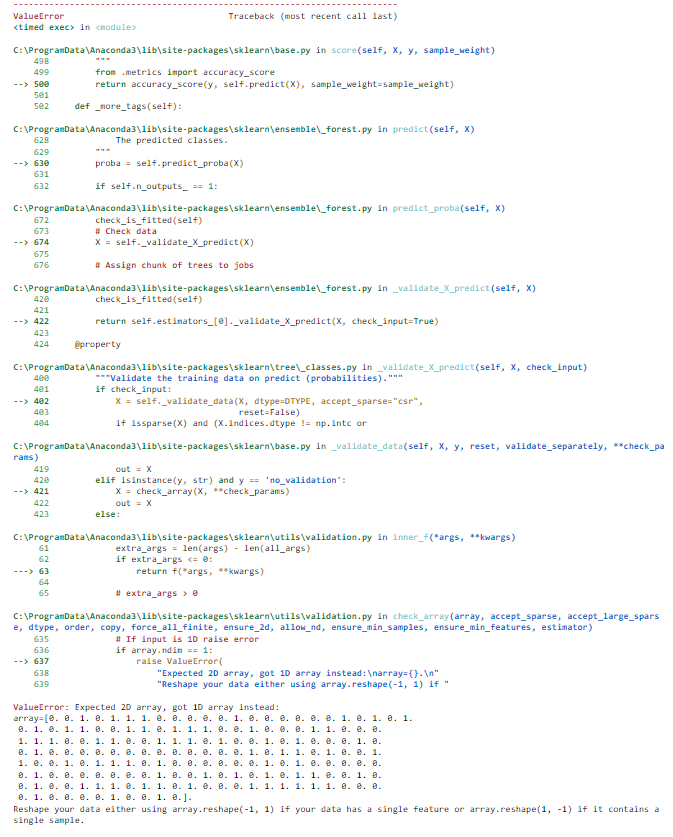

In [210]:
# %%time

# # Decision Tree

# decision_tree = DecisionTreeClassifier() 
# decision_tree.fit(X_train, Y_train)  

# Y_pred = decision_tree.predict(X_valid)  

# acc_decision_tree = round(decision_tree.score(Y_valid, Y_pred) * 100, 2)

In [211]:
# %%time

# # KNN

# knn = KNeighborsClassifier(n_neighbors = 3) 
# knn.fit(X_train, Y_train)  

# Y_pred = knn.predict(X_valid)  

# acc_knn = round(knn.score(Y_valid, Y_pred) * 100, 2)

In [212]:
# %%time

# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)

# Y_pred = logreg.predict(X_valid)

# acc_log = round(logreg.score(Y_valid, Y_pred) * 100, 2)

In [213]:
# %%time

# # XGBoost

# xgb_c = xgb.XGBClassifier()
# xgb_c.fit(X_train, Y_train)

# Y_pred = xgb_c.predict(X_valid)

# acc_xgb = round(xgb_c.score(Y_valid, Y_pred) * 100, 2)

#### 3.2 Method 2 (K-Fold Cross Validation)

<a id='method_2'></a>

I was unable to resolve errors in Method 1. Instead, we will train our data without train-test-split and use K-Fold Cross Validation instead

In [214]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

In [215]:
%%time

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

Wall time: 160 ms


In [216]:
%%time

# Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

Wall time: 7.97 ms


In [217]:
%%time

# KNN

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

Wall time: 37.9 ms


In [218]:
%%time

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

Wall time: 28.9 ms


In [219]:
%%time

# XGBoost

xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train, Y_train)

Y_pred = xgb_c.predict(X_test)

acc_xgb = round(xgb_c.score(X_train, Y_train) * 100, 2)

[12:25:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 135 ms


#### 3.3 Which is the best model?

In [220]:
model_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 
              'Logistic Regression', 'XG Boost'],
    'Score': [acc_random_forest, acc_decision_tree, acc_knn, 
              acc_log, acc_xgb]})

result_df = model_results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.66,Random Forest
99.66,Decision Tree
98.43,XG Boost
85.30,KNN
81.71,Logistic Regression


Great! Looks like Random Forest and Decision Tree both take the first two spots at 99.78 accuracy, followed by XGBoost (despite no scaling of data before using XG Boost). Since Random Forest [leverages the power of multiple decision trees](https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/) and does not rely on the feature importance given by a single decision tree, let's select Random Forest as our best model going forwards


Nonetheless, such a high score for Random Forest indicates overfitting. We can apply K-fold Cross Validation and then hyperparameter tuning (n_estimators, max_features, max_depth, min_samples_leaf, etc)

#### 3.4 K-Fold Cross Validation

K-Fold Validation results in a less biased model compare to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in training and test set

In [221]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state = 42)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.84444444 0.83146067 0.75280899 0.87640449 0.84269663 0.84269663
 0.83146067 0.76404494 0.86516854 0.86516854]
Mean: 0.8316354556803995
Standard Deviation: 0.03929900992903589


Our average score has now fallen to about 83.4%, which sounds less biased (less overfitting), while the standard deviation of that score is just 3.7%

### 4.0 Boosting the performance of our Random Forest

,importance
feature,
Travelgroup,0.274
Title,0.192
Sex,0.126
Age_qcut,0.103
relatives,0.067
Pclass,0.066
Deck,0.066
Fare_qcut,0.062
Embarked,0.030


Based on our results, we should drop not_alone as it does not play a significant role in our predictions


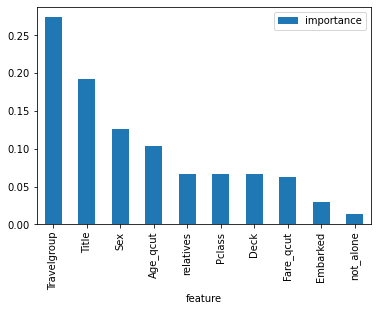

In [222]:
# let's also revisit our features to determine if there are any worth dropping. The more features we have, the more
# our model is also likely to suffer from overfitting

# we can do this by checking out feature importances in the Random Forest tree
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
display(importances.head(10))
importances.plot.bar()

print('Based on our results, we should drop not_alone as it does not play a significant role in our predictions')

#### 4.1 Running Random Forest Again (.drop not_alone)

In [223]:
# so lets drop 'not_alone'
train  = train.drop("not_alone", axis=1)
test  = test.drop("not_alone", axis=1)

In [224]:
# re-initialize model inputs
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

In [225]:
%%time

# now setting with oob_score =  True, which is to run an Out-of-Bag error estimate.
# This, (according to the inventor of Random Forests) the OOB score is equivalent to cross-validation score
# https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#ooberr
    
random_forest2 = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 42)
random_forest2.fit(X_train, Y_train)

Y_pred = random_forest2.predict(X_test)

acc_random_forest2 = round(random_forest2.score(X_train, Y_train) * 100, 2)
oob_score2 = round(random_forest2.oob_score_*100, 2)

print("accuracy score:", acc_random_forest2, "%")
print("oob score:", oob_score2, "%")

accuracy score: 99.66 %
oob score: 82.72 %
Wall time: 190 ms


Our Random Forest model continues to run just as well as it did before (99.66%), despite one less feature. Meanwhile, its OOB score (roughly equivalent to Cross Validation score) performance dropped only slightly to 82.5% from 83.4% earlier

#### 4.2 Random Forest Hyperparameter Tuning

In [226]:
from pprint import pprint

# Runing Random Forests takes a considerable amount of time, thus we should limit our hyperparameter tuning to the 
# most important parameters only

random_forest_base = RandomForestClassifier()
print('Parameters currently in use:\n')
pprint(random_forest_base.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Important Parameters:
- n_estimators = number of trees in the forest
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement

In [227]:
from sklearn.model_selection import RandomizedSearchCV

# we will apply Randomized Search instead of Grid Search as it consumes far less time

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 7, 10],
 'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000]}


In [228]:
# %%time 

# # Now to use the random_grid to search for best hyperparameters

# # First create the base model to tune
# random_forest_base = RandomForestClassifier()

# # Random search of parameters, using 5 fold cross validation, n_jobs = -1 to use all available cores, and 100 iterations
# random_forest_random = RandomizedSearchCV(
#     estimator = random_forest_base, 
#     param_distributions = random_grid, 
#     n_iter = 100, 
#     cv = 5, 
#     verbose = 2, 
#     random_state = 42, 
#     n_jobs = -1)

# # Fit the random search model
# random_forest_random.fit(X_train, Y_train)

# # Find the best estimators
# random_forest_random.best_params_

# # save
# random_forest_random_results = random_forest_random.best_params_
# %store random_forest_random_results
# del random_forest_random_results

# Load back
%store -r random_forest_random_results

random_forest_random_results

{'n_estimators': 483,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

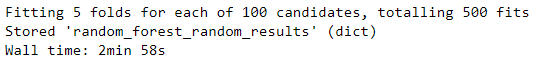

#### 4.3 Random Forest with Best Parameters

In [229]:
%%time

# Now to simply fit the best parameters found from RandomSearch
random_forest3 = RandomForestClassifier(n_estimators = 483,
                                       min_samples_split = 5,
                                       min_samples_leaf = 1,
                                       max_features = 'auto',
                                       max_depth = 90,
                                       bootstrap = True,
                                       oob_score = True, 
                                       random_state = 42, 
                                       n_jobs = -1)

random_forest3.fit(X_train, Y_train)

Y_pred3 = random_forest3.predict(X_test)

acc_random_forest3 = round(random_forest3.score(X_train, Y_train) * 100, 2)
oob_score3 = round(random_forest3.oob_score_*100, 2)

print("accuracy score:", acc_random_forest3, "%")
print("oob score:", oob_score3, "%")

accuracy score: 94.61 %
oob score: 84.51 %
Wall time: 946 ms


Our final Random Forest model saw improvements in its OOB scores to 84.51%, indicating that the model should perform better than previous iterations when predicting for unseen samples (such as our test set data)

In [230]:
Final_scores = pd.DataFrame({
    "Model":                       ['RF_Base',                  'RF_drop_alone',      'RF_tuning'],
    "Accuracy (%)":                [acc_random_forest,           acc_random_forest2,   acc_random_forest3],
    "KFold/OOB Accuracy(%)":       [round(scores.mean()*100,2),  oob_score2,           oob_score3]})

Final_scores

,Model,Accuracy (%),KFold/OOB Accuracy(%)
0,RF_Base,99.66,83.16
1,RF_drop_alone,99.66,82.72
2,RF_tuning,94.61,84.51


### 5.0 Predictions on Test Set

In [235]:
test_temp = pd.read_csv\
(r"C:\Users\brianlimcn\OneDrive\Desktop\Ever_AI\Titanic_data\titanic\test.csv")

Predicted_test = test_temp
Predicted_test['Survived']=Y_pred3
Predicted_test.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
Predicted_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [236]:
Predicted_test.to_csv(r"C:\Users\brianlimcn\OneDrive\Desktop\Ever_AI\Kaggle Submission\submission.csv", index=False)